In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
#creating dataframe

df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

#checking head of dataframe
df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33            184.6      2019.0            0.1622   
1          23.41            158.8      1956.0            0.1238   
2          25.53            152.5      1709.0            0.1444   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  

[3 rows x 30 columns]

In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [7]:
from sklearn.cluster import KMeans

In [10]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df_scalar=scalar.fit_transform(df)
df_scalar

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [8]:
from sklearn.decomposition import PCA
pca=PCA()
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.fit(df_scalar)
x_pca=pca.transform(df_scalar)
x_pca

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [10]:
print(df_scalar.shape)
print(x_pca.shape)

(569, 30)
(569, 30)


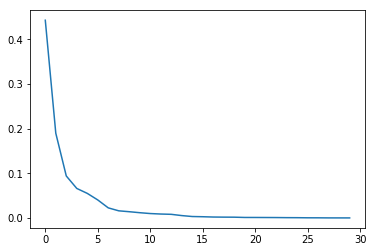

In [11]:
plt.plot(pca.explained_variance_ratio_)

In [12]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=3)
pca1

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca1.fit(df_scalar)
x_pca=pca1.transform(df_scalar)
x_pca

array([[ 9.19283683,  1.94858306, -1.12316592],
       [ 2.3878018 , -3.76817175, -0.52929231],
       [ 5.73389628, -1.0751738 , -0.55174758],
       ...,
       [ 1.25617928, -1.90229671,  0.56273039],
       [10.37479406,  1.67201011, -1.87702954],
       [-5.4752433 , -0.67063681,  1.49044356]])

In [14]:
kmeans=KMeans(random_state=0).fit(x_pca) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[ 2.92093297  1.97761668 -1.72026164]
 [ 3.17887762 -2.25786758 -0.07716947]
 [ 7.7908599   0.61817616  1.04995459]
 [-3.23404984 -1.24869055  0.16566874]
 [-1.24978289 -0.03820963 -0.81679531]
 [-2.17180488  1.87381113  1.17030818]
 [ 3.35046325  6.97574215  1.73370299]
 [ 8.91127118 -4.87642743  1.65816593]]
[2 1 1 6 1 0 1 0 0 6 4 0 2 4 0 0 4 0 1 4 4 5 0 1 1 2 0 1 0 1 2 0 0 1 0 0 0
 3 3 0 3 4 2 0 4 0 5 0 4 4 3 3 3 1 4 3 1 0 3 5 5 5 0 5 0 0 5 3 6 3 1 6 0 4
 3 1 5 2 2 4 5 0 7 2 4 1 4 1 4 0 3 4 3 3 0 1 5 5 4 4 4 5 3 5 5 0 4 3 2 4 5
 5 6 5 5 4 5 0 0 1 4 1 2 4 3 3 4 1 0 1 4 1 1 4 1 4 3 3 2 5 3 1 5 4 3 5 0 5
 4 3 4 6 6 3 4 4 1 3 3 3 5 1 1 5 1 3 3 1 1 3 4 4 0 5 3 3 6 0 3 3 7 2 4 5 4
 5 1 3 3 3 6 5 3 0 0 3 0 1 1 0 4 1 2 0 4 4 5 1 0 3 1 3 7 6 0 0 5 5 1 1 4 4
 5 0 3 4 3 4 4 0 0 3 3 1 5 3 7 1 4 1 3 3 0 3 1 5 3 0 4 4 2 3 2 1 1 4 2 0 2
 0 1 3 1 3 1 7 5 3 4 5 3 4 7 5 1 5 3 1 3 4 1 3 1 0 5 3 5 3 5 5 6 4 4 3 3 3
 3 3 3 5 2 5 2 5 3 3 3 3 3 3 3 3 4 3 5 3 3 1 6 3 5 1 4 2 3 3 3 3 1 0 0 4 5
 3 3 1 4 1 5

In [15]:
## Elbow test
cluster_range = range(1,20)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(x_pca)
    cluster_errors.append(clusters.inertia_)

In [16]:
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:10]

num_clusters  cluster_errors
0             1    12399.028514
1             2     6928.106850
2             3     5422.816633
3             4     4676.122941
4             5     4047.403994
5             6     3567.767101
6             7     3228.063270
7             8     2963.911390
8             9     2778.460195
9            10     2598.901871

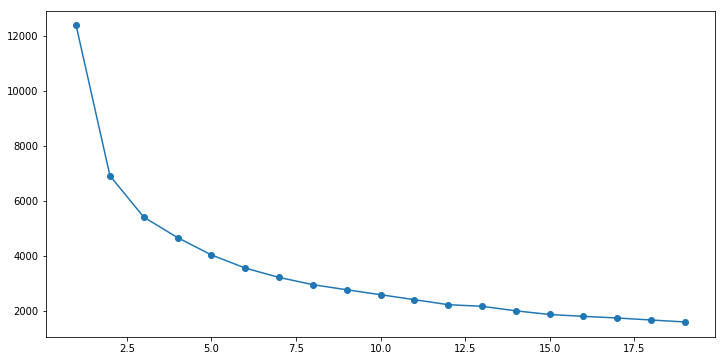

In [17]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [18]:
kmeans=KMeans(n_clusters=2,random_state=0).fit(x_pca) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[-2.18497103  0.01868571  0.08796688]
 [ 4.39306344 -0.03756916 -0.17686463]]
[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [35.0, 35.0, 53.75, 53.75],
  [25.0, 25.0, 44.375, 44.375],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [155.0, 155.0, 173.75, 173.75],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [164.375, 164.375, 225.625, 225.625],
  [132.5, 132.5, 195.0, 195.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [332.5, 332.5, 360.0, 360.0],
  [310.0, 310.0, 346.25, 346.25],
  [282.5

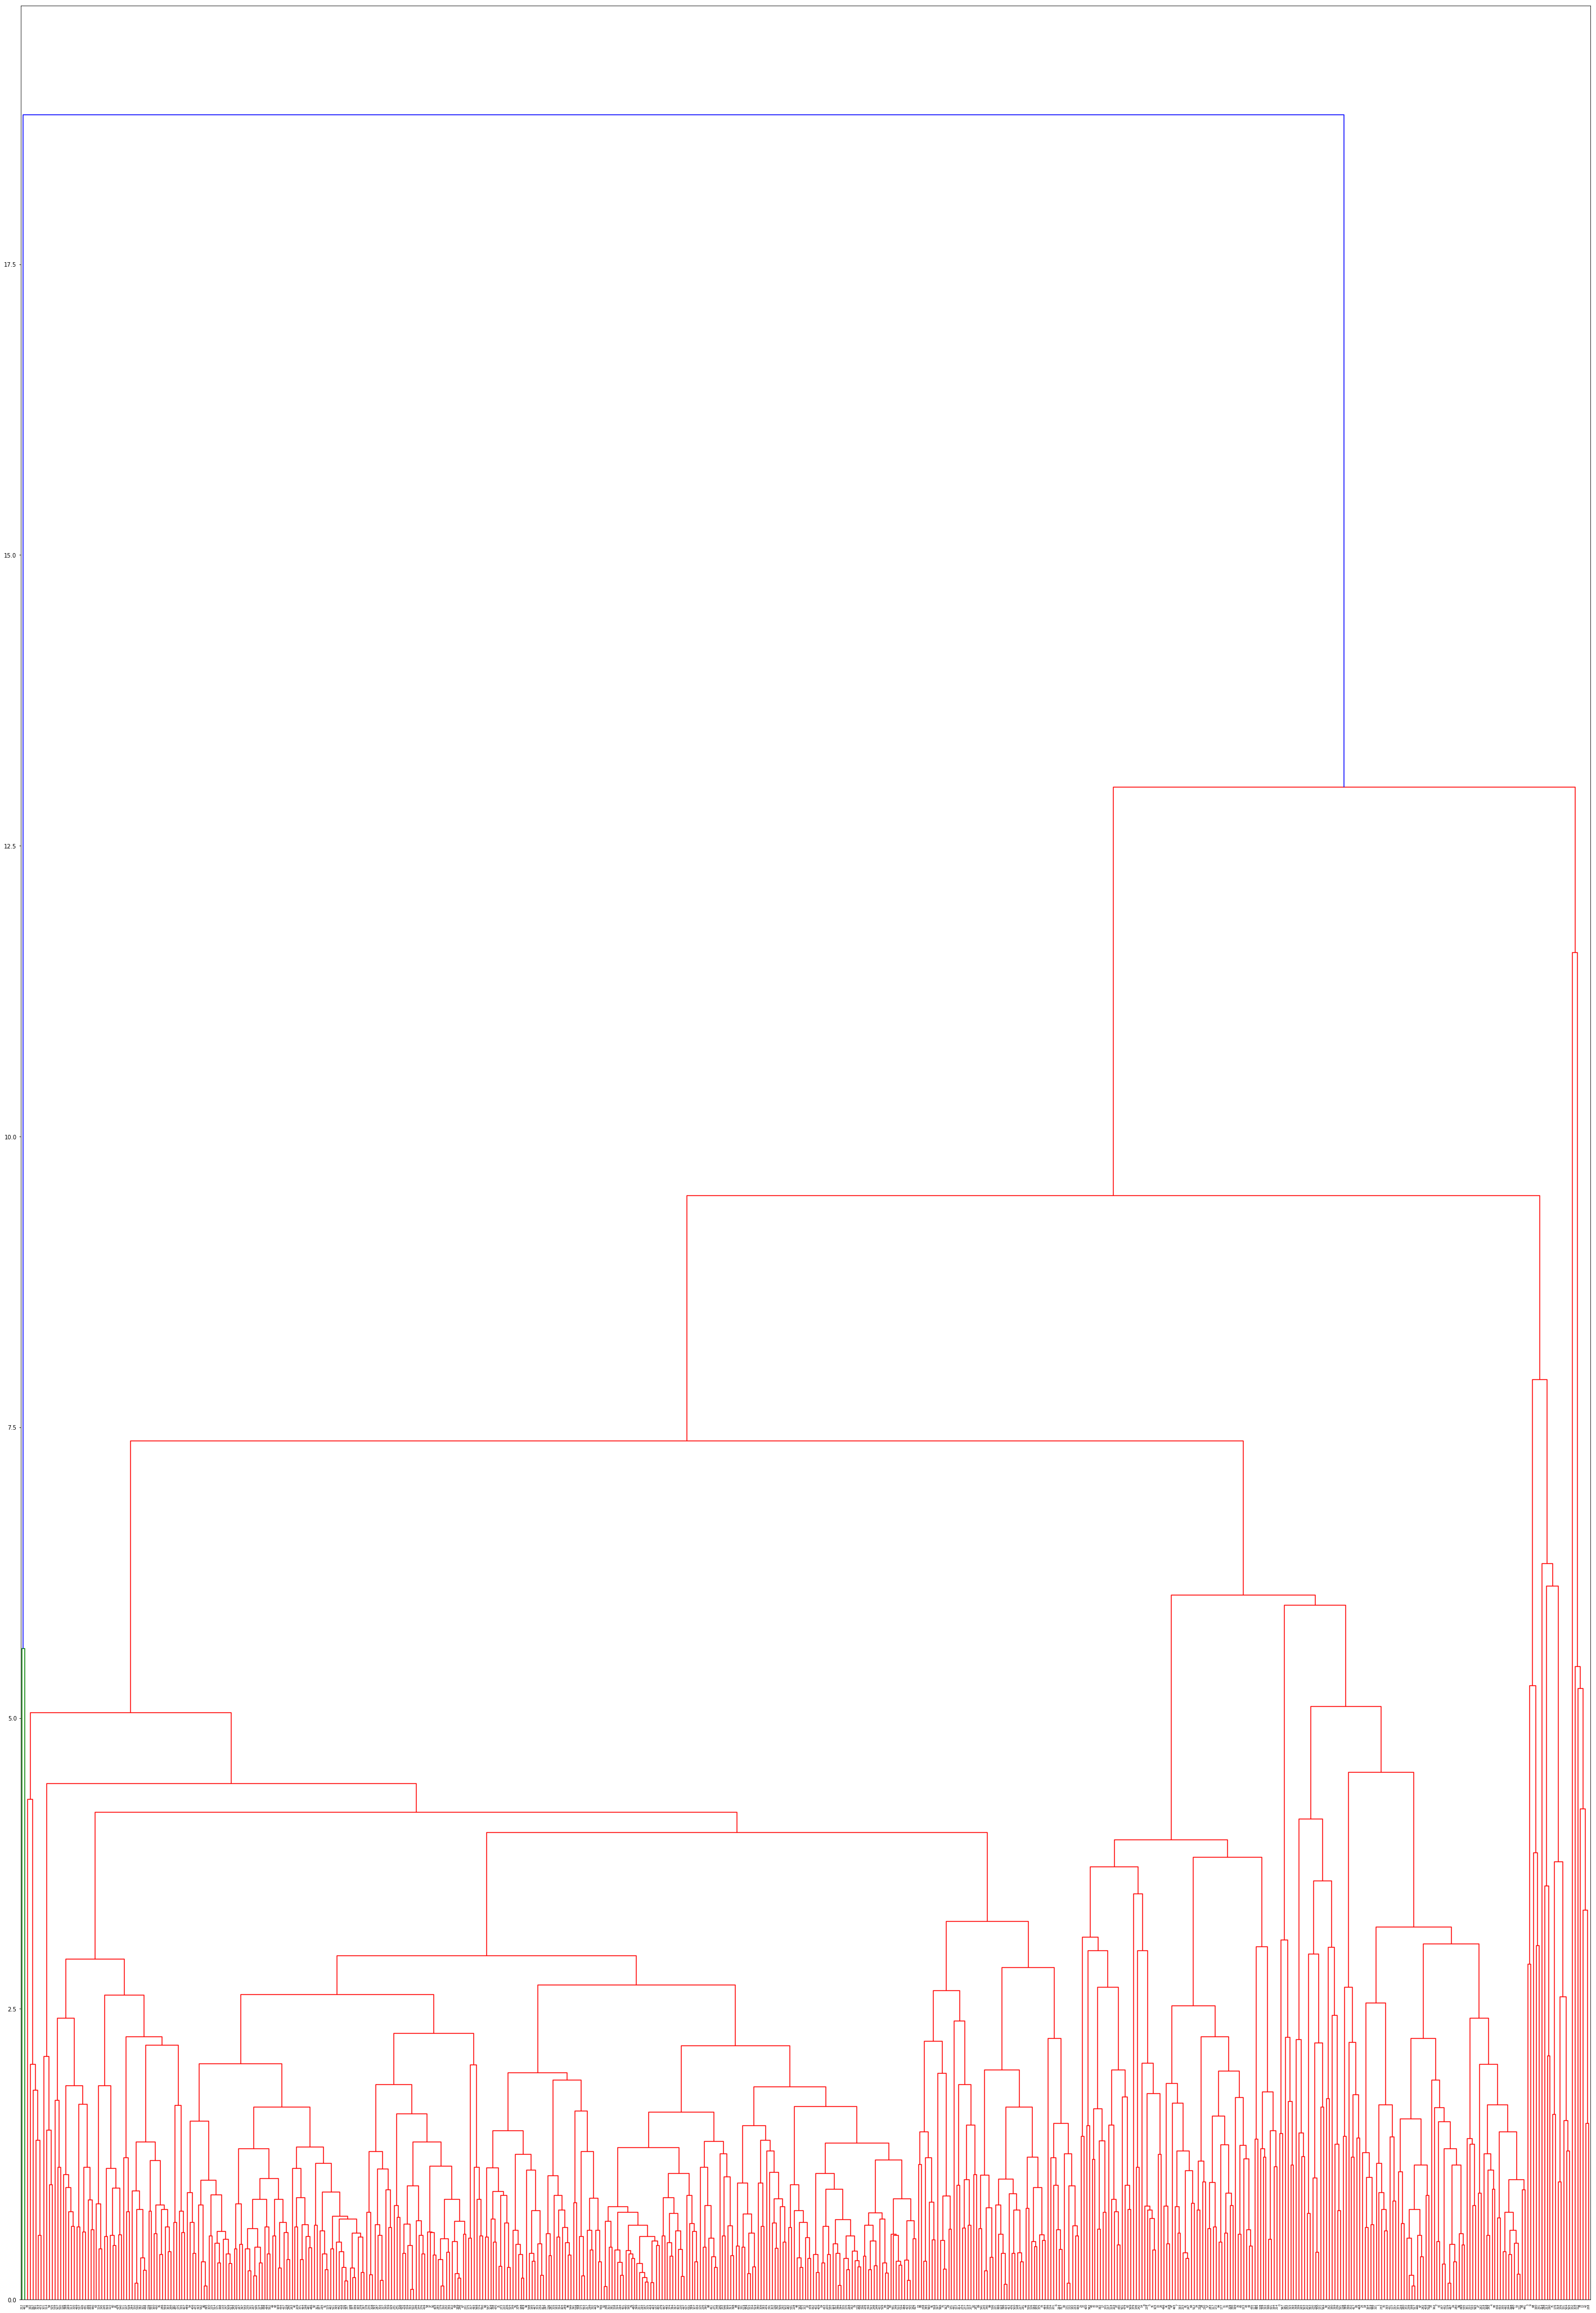

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage



z=linkage(x_pca,'average')  ## single,complete,average,centroid,wards
plt.figure(figsize=(50,75))
dendrogram(z)

In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(x_pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [33]:
from sklearn.manifold import TSNE
#Defining Model
model=TSNE(learning_rate=100)

#Fitting Model
transformed = model.fit_transform(x_pca)

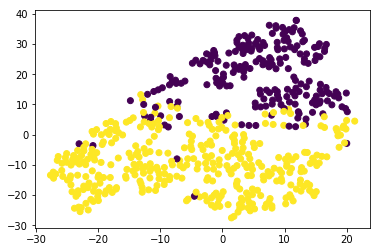

In [34]:
x_axis = transformed[:,0]
y_axis = transformed[:,1]
plt.scatter(x_axis,y_axis,c=cancer.target)
plt.show()

In [31]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(x_pca.data)
dbscan.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
        0, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  3, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  2, -1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  2, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1,
        1,  4,  3, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

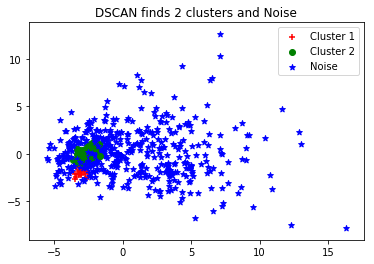

In [32]:
# Plot based on Class
for i in range(0,x_pca.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(x_pca[i,0],x_pca[i,1],c='r',marker='+')
    elif dbscan.labels_[i] ==1:
        c2 = plt.scatter(x_pca[i,0],x_pca[i,1],c='g',marker='o')
    elif dbscan.labels_[i] ==-1:
        c3 = plt.scatter(x_pca[i,0],x_pca[i,1],c='b',marker='*')

plt.legend([c1,c2,c3],['Cluster 1','Cluster 2','Noise'])
plt.title('DSCAN finds 2 clusters and Noise')
plt.show()